# MNIST Predict Data

## Predict data using OpenCV

## Import Libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import backend as K
K.clear_session()

import sys
import numpy as np
import cv2
import urllib

import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Define the dimensions of an image and colors.

### I've used default mnist data dimension: $28\times 28$ and also used B&W colors.

In [6]:
img_width, img_height = 28, 28
color_dim = 1 # replace 1 with 3 for Colored images.

## Preprocessing Data

### It is better to make values between 0 and 1.

In [7]:
num_classes = 10

X_train = X_train.reshape(60000,img_width,img_height,color_dim)
X_test = X_test.reshape(10000,img_width,img_height,color_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Create a Model

In [9]:
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(img_width, img_height, color_dim)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              513000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total para

## Compile Model

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Train Model
### I've trained this model only once. You can increase epochs to train this model multiple times.

In [11]:
trained_data = model.fit(X_train, y_train, epochs=1, verbose=1, validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/1
60000/60000 [==============================] - 294s - loss: 0.1173 - acc: 0.9637 - val_loss: 0.0469 - val_acc: 0.9853


## Save and load the pre-trained model

### Uncomment the following code to do so.

In [12]:
## model.save_weights('model.h5')
## model.load_weights('model.h5')

## Graphical Representation of training

### Increse epochs to see the graph

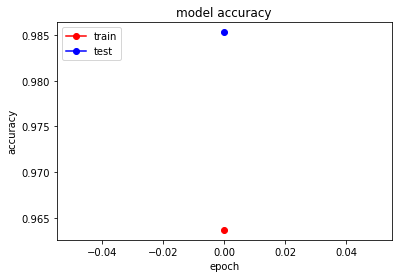

In [20]:
plt.plot(trained_data.history['acc'],marker='o', color='r')
plt.plot(trained_data.history['val_acc'],marker='o', color='b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Print all the values

In [21]:
print(trained_data.history)

{'val_loss': [0.04685181547993173], 'loss': [0.1172717548537689], 'val_acc': [0.9852833333333333], 'acc': [0.9637166666666667]}


## Fetching an Image from web and resizing using CV2

## Define a function to convert Web URLs into image using CV2

### If you want to use an image from your computer, simply provide the path to your image inside imread()

``` img = cv2.imread('path/to/your/image') ```

### You can also pass this path as an argument
``` img = cv2.imread(sys.arg[1]) ```

In [33]:
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, 0)
 
    # return the image
    return image

In [34]:
img_url = "http://bradleymitchell.me/wp-content/uploads/2014/06/decompressed.jpg"

img = url_to_image(img_url)
img = cv2.resize(img, (img_width, img_height))

arr = np.array(img).reshape((img_width,img_height,color_dim))
arr = np.expand_dims(arr, axis=0)

print(arr.shape)

(1, 28, 28, 1)


## Prediction

In [36]:
prediction = model.predict(arr)[0]
bestclass = ''
bestconf = -1
for n in [0,1,2,3,4,5,6,7,8,9]:
    if (prediction[n] > bestconf):
        bestclass = str(n)
        bestconf = prediction[n]
print ('Predicted the digit ' + bestclass + ' with ' + str(bestconf * 100) + '% confidence.')

Predicted the digit 5 with 100.0% confidence.
